In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df=pd.read_csv(r"FuelConsumption.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


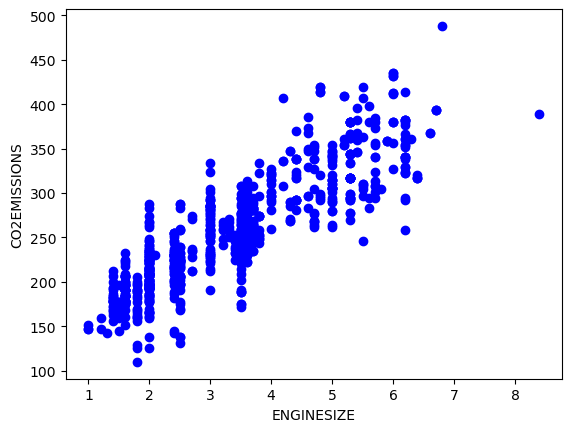

In [7]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [9]:
mask=np.random.rand(len(df))<0.8
train=df[mask]
test=df[~mask]

In [27]:
#when we only have one feature, we can use degree=2 thereby generating a matrix with the additional 2 features
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
regres=linear_model.LinearRegression()
trainX=np.asanyarray(train[["ENGINESIZE"]])
trainY=np.asanyarray(train[["CO2EMISSIONS"]])
testX=np.asanyarray(test[["ENGINESIZE"]])
testY=np.asanyarray(test[["CO2EMISSIONS"]])

poly=PolynomialFeatures(degree=2)
poly_trainX=poly.fit_transform(trainX)
poly_trainX[30:35]

array([[ 1.  ,  4.  , 16.  ],
       [ 1.  ,  6.3 , 39.69],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ]])

In [28]:
regres.fit(poly_trainX,trainY)
print(f"Coeficients:{regres.coef_}")
print(f"Intercept:{regres.intercept_}")

Coeficients:[[ 0.         51.47223766 -1.58189078]]
Intercept:[105.15381805]


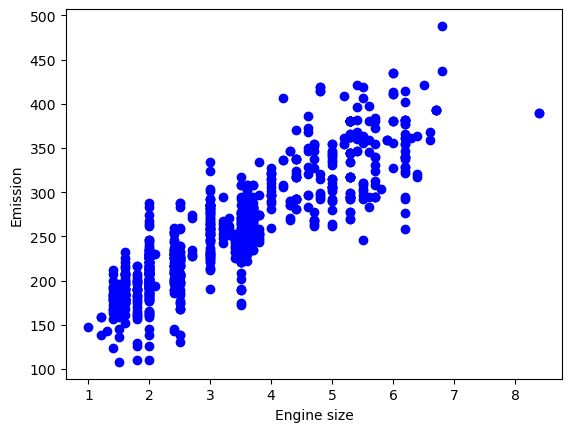

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
#poly_y=
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [31]:
high=df["ENGINESIZE"].max()
low=df["ENGINESIZE"].min()
print(f"Largest:{high} smallest {low}")

Largest:8.4 smallest 1.0


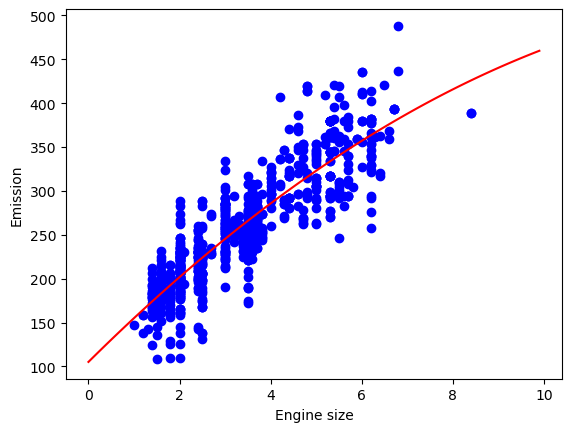

In [32]:
#visualize
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regres.intercept_[0]+ regres.coef_[0][1]*XX+ regres.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [35]:
#evaluation
from sklearn.metrics import r2_score

poly_testX=poly.transform(testX)
pred_y=regres.predict(poly_testX)
print("MAE:",np.mean(np.absolute(testY-pred_y)))
print("Variation Score:",r2_score(testY,pred_y))

MAE: 21.891879748214997
Variation Score: 0.762195581782493
